<a href="https://colab.research.google.com/github/MinhNhata/BTVN_1_19146227_MinhNhat/blob/main/Cuoiki_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,preprocessing

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint 

In [5]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [6]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D,Dense
model=Sequential() 

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same' ,input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [8]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/final_AI/train',target_size = (150,150),batch_size = 32,class_mode =  'categorical')

Found 484 images belonging to 2 classes.


In [9]:
test_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/final_AI/test',target_size = (150,150),batch_size = 32,class_mode =  'categorical')


Found 99 images belonging to 2 classes.


In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history=model.fit(training_set,epochs=20,batch_size=32,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])


Epoch 1/20
16/16 [==============================] - 159s 10s/step - loss: 2.9434 - accuracy: 0.5434 - val_loss: 0.6811 - val_accuracy: 0.5152
Epoch 2/20
16/16 [==============================] - 98s 6s/step - loss: 0.6780 - accuracy: 0.6798 - val_loss: 0.5037 - val_accuracy: 0.6667
Epoch 3/20
16/16 [==============================] - 103s 6s/step - loss: 0.2632 - accuracy: 0.9008 - val_loss: 0.3469 - val_accuracy: 0.8485
Epoch 4/20
16/16 [==============================] - 103s 6s/step - loss: 0.0813 - accuracy: 0.9731 - val_loss: 0.0820 - val_accuracy: 0.9697
Epoch 5/20
16/16 [==============================] - 109s 7s/step - loss: 0.0535 - accuracy: 0.9876 - val_loss: 0.0638 - val_accuracy: 0.9697
Epoch 6/20
16/16 [==============================] - 107s 7s/step - loss: 0.0156 - accuracy: 0.9938 - val_loss: 0.1053 - val_accuracy: 0.9697
Epoch 7/20
16/16 [==============================] - 104s 6s/step - loss: 0.0675 - accuracy: 0.9814 - val_loss: 0.0149 - val_accuracy: 1.0000
Epoch 8/20
16

In [12]:
from keras.models import load_model
model.save('Cuoiki_AI.h5')
model_CNN = load_model('Cuoiki_AI.h5')

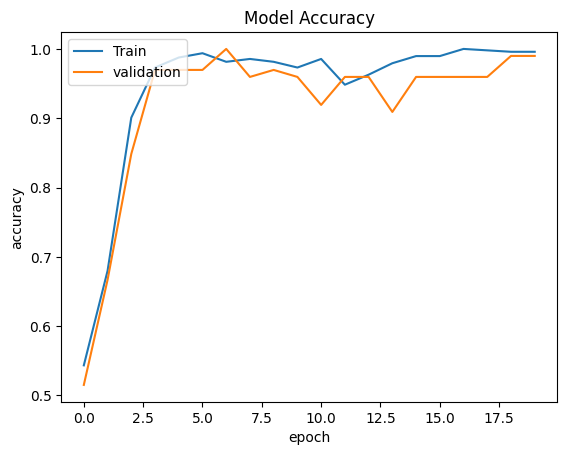

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [14]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0019475420704111457
Train Accuracy 1.0


In [16]:
training_set.class_indices

{'close eyes': 0, 'open eyes': 1}

1/1 [==============================] - 0s 248ms/step
Close eyes


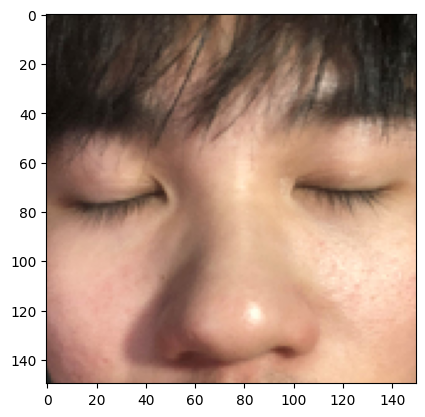

1/1 [==============================] - 0s 63ms/step
Open eyes


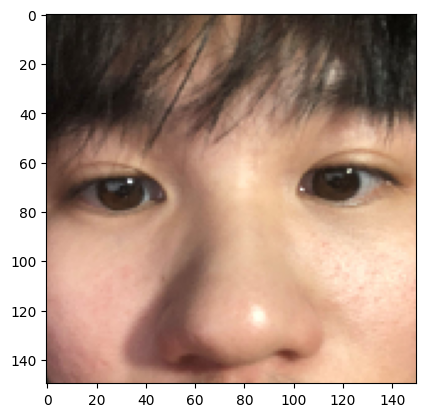

In [22]:
import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
model_CNN = load_model('/content/Cuoiki_AI.h5')
test="/content/gdrive/MyDrive/final_AI/val"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Close eyes'
  if round(result[0][1])==1:
    prediction='Open eyes'


  print(prediction)
  plt.show()